In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.exposure import rescale_intensity

In [2]:
def convolve(image, kernel):
    (iH, iW) = image.shape[0], image.shape[1]
    (kH, kW) = kernel.shape[0], kernel.shape[1]

    paddle = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, paddle, paddle, paddle, paddle, cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")

    for y in np.arange(paddle, iH + paddle):
        for x in np.arange(paddle, iW + paddle):

            roi = image[y - paddle:y + paddle + 1, x - paddle:x + paddle + 1]
            k = (roi * kernel).sum()
            output[y - paddle, x - paddle] = k

    # rescale the output image to be in the range [0, 255]
    output = rescale_intensity(output, in_range=(0, 255))
    print(output)
    output = (output * 255).astype("uint8")

    return output

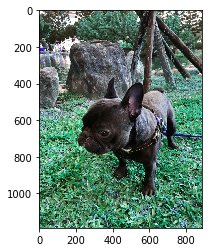

In [8]:
img = cv2.imread('dog.jpg')
plt.imshow(img)

[[0.         0.         0.         ... 0.12156863 0.         0.00392157]
 [0.         0.         0.         ... 0.05882353 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.09411765 ... 0.         0.         0.        ]
 [0.07450981 0.18039216 0.21960784 ... 0.         0.         0.        ]
 [0.08627451 0.24705882 0.32941177 ... 0.         0.         0.        ]]


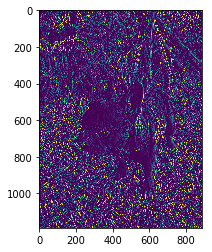

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
kernel = np.array([[-1,0,1],[-2,0,2],[-1, 0,1]])

plt.imshow(convolve(gray, kernel))